<a href="https://colab.research.google.com/github/pedro-de-bastos/CS166-Modeling-Simulation-and-Decision-Making/blob/main/Problem_2_CS166_Assignment_Networks_Problem_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2: CS166 Assignment Networks Problem Set


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy.stats as sts

m0 = 5 # number of nodes in initial condition
m = 2 # number of edges per new node
p = 0.5

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    plt.cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = np.random.uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)

def update_modified():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        flip = np.random.random()
        if flip > p: #My addition to select preferential or random edges
          nds = list(g.nodes)
          newcomer = max(nds) + 1
          for i in range(m):
              j = pref_select(nds)
              g.add_edge(newcomer, j)
              nds.remove(j)
        else:
          nds = list(g.nodes)
          newcomer = max(nds) + 1
          for i in range(m):
            j = np.random.choice(nds)
            g.add_edge(newcomer, j)
            #nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)


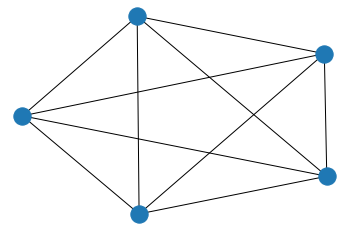

In [16]:
m = 2
m0 = 5
initialize()
observe()

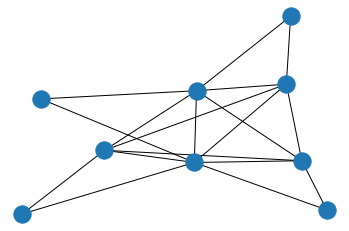

In [20]:
for i in range(20):
  update()
observe()

(array([37., 10.,  1.,  2.,  2.,  0.,  2.,  0.,  0.,  1.]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22.]),
 <a list of 10 Patch objects>)

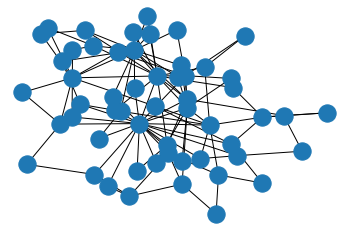

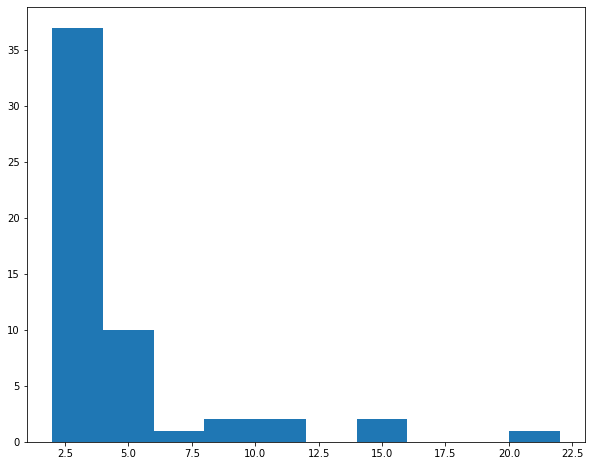

In [3]:
m = 2
m0 = 5

initialize()
for k in range(1000):
  update()
observe()
plt.figure(figsize = (10, 8))
plt.hist([g.degree(i) for i in g.nodes()])

(array([32.,  6., 11.,  2.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <a list of 10 Patch objects>)

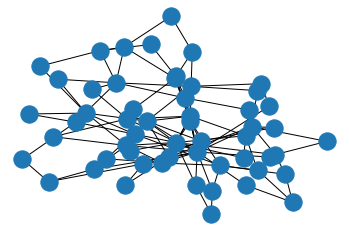

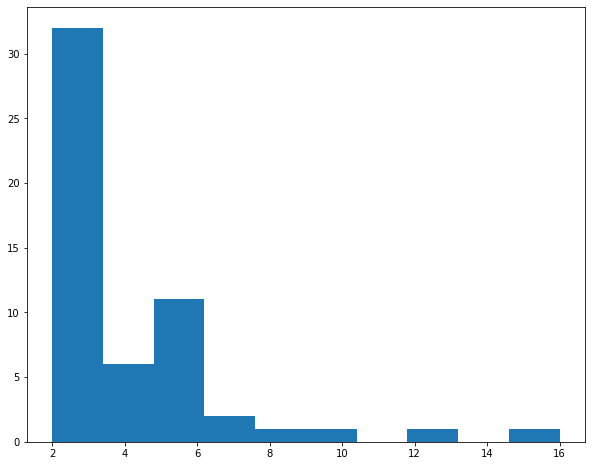

In [ ]:
initialize()
for k in range(1000):
  update_modified()
observe()
plt.figure(figsize = (10, 8))
plt.hist([g.degree(i) for i in g.nodes()])

# Original Algorithm

## Changing M

In [ ]:
m0 = 5
edges = [2, 3, 5]
results = {}

for i in edges:
  m = i
  results[i] = []
  for j in range(100):
    initialize()
    for k in range(500):
      update()
    deg_list = [g.degree(i) for i in g.nodes()]
    results[i].append(deg_list)

In [ ]:
original_m = []
for i, j in enumerate(edges):
  array = np.asarray(results[j])
  array = array.flatten()
  original_m.append(array)
  

Text(0.5, 1.0, 'Original Algorithm')

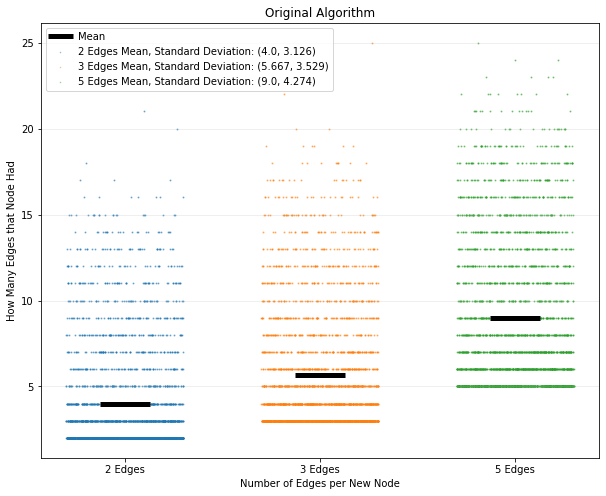

In [ ]:
def plot_col_hist(data_list, data_labels):
  plt.figure(figsize=(10,8))
  for i, j in enumerate(data_list):
      plt.scatter(sts.uniform.rvs(loc=i+1-0.3, scale=0.6, size=len(j)), 
                j, s=1, alpha=0.5, label = f"{data_labels[i]} Mean, Standard Deviation: ({round(np.mean(j), 3)}, {round(np.std(j), 3)})")
      
  means = [np.mean(i) for i in data_list]

  plt.plot(range(1, len(data_labels)+1),
          means, 
          marker='_',linewidth=0,color="black",alpha=1,markersize=50, markeredgewidth = 5, label = "Mean")

  plt.xticks(range(1, len(data_labels)+1), 
            data_labels)
  
  plt.grid(True, alpha=0.25, axis='y')

plot_col_hist(original_m, ["2 Edges", "3 Edges", "5 Edges"])
plt.xlabel("Number of Edges per New Node")
plt.ylabel("How Many Edges that Node Had")
plt.legend(markerscale = 0.5)
plt.title("Original Algorithm")

## Changing M0

In [ ]:
initial_nodes = [5, 10, 20]
m = 2
results = {}

for i in initial_nodes:
  m0 = i
  results[i] = []
  for j in range(100):
    initialize()
    for k in range(500):
      update()
    deg_list = [g.degree(i) for i in g.nodes()]
    results[i].append(deg_list)

In [ ]:
original_m0 = []
for i, j in enumerate(initial_nodes):
  array = np.asarray(results[j])
  array = array.flatten()
  original_m0.append(array)

Text(0.5, 1.0, 'Original Algorithm')

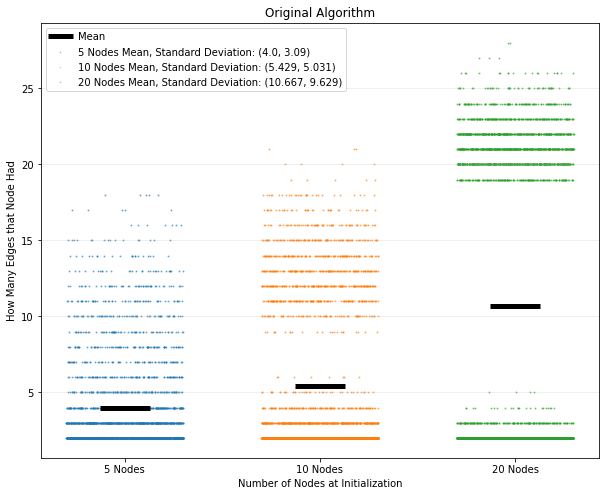

In [ ]:
def plot_col_hist(data_list, data_labels):
  plt.figure(figsize=(10,8))
  for i, j in enumerate(data_list):
      plt.scatter(sts.uniform.rvs(loc=i+1-0.3, scale=0.6, size=len(j)), 
                j, s=1, alpha=0.5, label = f"{data_labels[i]} Mean, Standard Deviation: ({round(np.mean(j), 3)}, {round(np.std(j), 3)})")
      
  means = [np.mean(i) for i in data_list]

  plt.plot(range(1, len(data_labels)+1),
          means, 
          marker='_',linewidth=0,color="black",alpha=1,markersize=50, markeredgewidth = 5, label = "Mean")

  plt.xticks(range(1, len(data_labels)+1), 
            data_labels)
  
  plt.grid(True, alpha=0.25, axis='y')

plot_col_hist(original_m0, ["5 Nodes", "10 Nodes", "20 Nodes"])
plt.xlabel("Number of Nodes at Initialization")
plt.ylabel("How Many Edges that Node Had")
plt.legend(markerscale = 0.5)
plt.title("Original Algorithm")

# Modified Algorithm

## Changing M

In [ ]:
m0 = 5
edges = [2, 3, 5]
results = {}

for i in edges:
  m = i
  results[i] = []
  for j in range(100):
    initialize()
    for k in range(500):
      update_modified()
    deg_list = [g.degree(i) for i in g.nodes()]
    results[i].append(deg_list)

In [ ]:
modified_m = []
for i, j in enumerate(edges):
  array = np.asarray(results[j])
  array = array.flatten()
  modified_m.append(array)
  

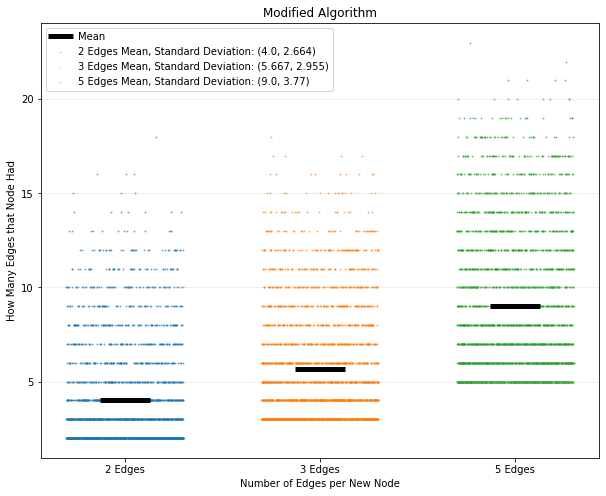

In [ ]:
def plot_col_hist(data_list, data_labels):
  plt.figure(figsize=(10,8))
  for i, j in enumerate(data_list):
      plt.scatter(sts.uniform.rvs(loc=i+1-0.3, scale=0.6, size=len(j)), 
                j, s=1, alpha=0.5, label = f"{data_labels[i]} Mean, Standard Deviation: ({round(np.mean(j), 3)}, {round(np.std(j), 3)})")
      
  means = [np.mean(i) for i in data_list]

  plt.plot(range(1, len(data_labels)+1),
          means, 
          marker='_',linewidth=0,color="black",alpha=1,markersize=50, markeredgewidth = 5, label = "Mean")

  plt.xticks(range(1, len(data_labels)+1), 
            data_labels)
  
  plt.grid(True, alpha=0.25, axis='y')

plot_col_hist(modified_m, ["2 Edges", "3 Edges", "5 Edges"])
plt.xlabel("Number of Edges per New Node")
plt.ylabel("How Many Edges that Node Had")
plt.title('Modified Algorithm')
plt.legend(markerscale = 0.5)

## Changing M0

In [ ]:
initial_nodes = [5, 10, 20]
m = 2
results = {}

for i in initial_nodes:
  m0 = i
  results[i] = []
  for j in range(100):
    initialize()
    for k in range(500):
      update_modified()
    deg_list = [g.degree(i) for i in g.nodes()]
    results[i].append(deg_list)

In [ ]:
modified_m0 = []
for i, j in enumerate(initial_nodes):
  array = np.asarray(results[j])
  array = array.flatten()
  modified_m0.append(array)

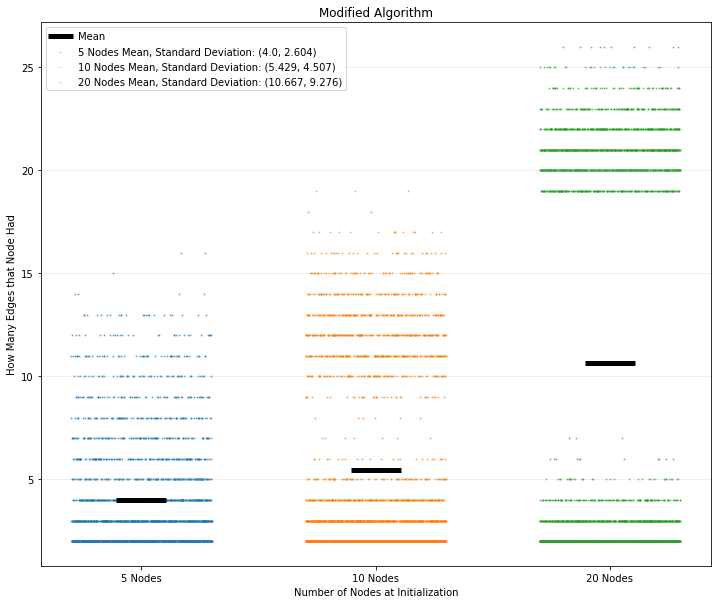

In [ ]:
def plot_col_hist(data_list, data_labels):
  plt.figure(figsize=(12,10))
  for i, j in enumerate(data_list):
      plt.scatter(sts.uniform.rvs(loc=i+1-0.3, scale=0.6, size=len(j)), 
                j, s=1, alpha=0.5, label = f"{data_labels[i]} Mean, Standard Deviation: ({round(np.mean(j), 3)}, {round(np.std(j), 3)})")
      
  means = [np.mean(i) for i in data_list]

  plt.plot(range(1, len(data_labels)+1),
          means, 
          marker='_',linewidth=0,color="black",alpha=1,markersize=50, markeredgewidth = 5, label = 'Mean')

  plt.xticks(range(1, len(data_labels)+1), 
            data_labels)
  
  plt.grid(True, alpha=0.25, axis='y')

plot_col_hist(modified_m0, ["5 Nodes", "10 Nodes", "20 Nodes"])
plt.xlabel("Number of Nodes at Initialization")
plt.ylabel("How Many Edges that Node Had")
plt.title("Modified Algorithm")
plt.legend(markerscale = 0.5)

## Changing P

In [ ]:
initial_nodes = 5
m = 2
probabilities = [0.2, 0.5, 0.8]
results = {}

for i in probabilities:
  p = i
  results[i] = []
  for j in range(100):
    initialize()
    for k in range(500):
      update_modified()
    deg_list = [g.degree(i) for i in g.nodes()]
    results[i].append(deg_list)

In [ ]:
modified_p = []
for i, j in enumerate(probabilities):
  array = np.asarray(results[j])
  array = array.flatten()
  modified_p.append(array)

Text(0.5, 1.0, 'Modified Algorithm')

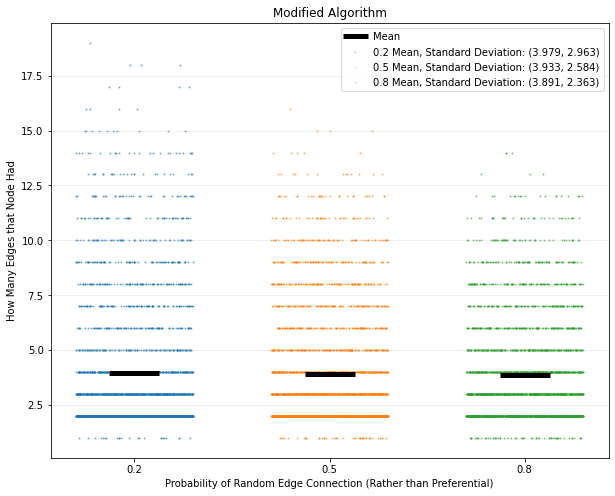

In [ ]:
def plot_col_hist(data_list, data_labels):
  plt.figure(figsize=(10,8))
  for i, j in enumerate(data_list):
      plt.scatter(sts.uniform.rvs(loc=i+1-0.3, scale=0.6, size=len(j)), 
                j, s=1, alpha=0.5, label = f"{data_labels[i]} Mean, Standard Deviation: ({round(np.mean(j), 3)}, {round(np.std(j), 3)})")
      
  means = [np.mean(i) for i in data_list]

  plt.plot(range(1, len(data_labels)+1),
          means, 
          marker='_',linewidth=0,color="black",alpha=1,markersize=50, markeredgewidth = 5, label = "Mean")

  plt.xticks(range(1, len(data_labels)+1), 
            data_labels)
  
  plt.grid(True, alpha=0.25, axis='y')

plot_col_hist(modified_p, probabilities)
plt.xlabel("Probability of Random Edge Connection (Rather than Preferential)")
plt.ylabel("How Many Edges that Node Had")
plt.legend(markerscale = 0.5)
plt.title("Modified Algorithm")